In [13]:
#importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities
cities = []
#identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique add it to the list
    if city not in cities:
        cities.append(city)
len(cities)

624

In [5]:
#creating the base url without cities
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [6]:
#create an empty list to hold the weather data
city_data = []
#Print the begining of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create the counters
record_count = 1
set_count = 1

#loop through all the cities in the list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count+=1
        record_count=1
    
    #create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    #add 1 to the record count
    record_count+=1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | destin
Processing Record 3 of Set 1 | tommot
Processing Record 4 of Set 1 | codrington
Processing Record 5 of Set 1 | ahipara
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | moose factory
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | bengkulu
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | ko samui
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | ilhabela
Processing Record 20 of Set 1 | novoaleksandrovsk
Processing Record 21 of Set 1 | dumas
Processing Record 22 of Set 1 | attawapiskat
City not found. Skipping...
Proc

Processing Record 37 of Set 4 | paysandu
Processing Record 38 of Set 4 | okha
Processing Record 39 of Set 4 | kautokeino
Processing Record 40 of Set 4 | ekhabi
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | vysokovsk
Processing Record 43 of Set 4 | westport
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | el bosque
Processing Record 1 of Set 5 | egvekinot
Processing Record 2 of Set 5 | hofn
Processing Record 3 of Set 5 | bhachau
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | iquique
Processing Record 6 of Set 5 | terrasini
Processing Record 7 of Set 5 | nome
Processing Record 8 of Set 5 | hamilton
Processing Record 9 of Set 5 | upata
Processing Record 10 of Set 5 | tual
Processing Record 11 of Set 5 

Processing Record 29 of Set 8 | barela
Processing Record 30 of Set 8 | provost
Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | nanortalik
Processing Record 33 of Set 8 | khunti
Processing Record 34 of Set 8 | kieta
Processing Record 35 of Set 8 | pierre
Processing Record 36 of Set 8 | ceske velenice
Processing Record 37 of Set 8 | whitewater
Processing Record 38 of Set 8 | nogliki
Processing Record 39 of Set 8 | taos
Processing Record 40 of Set 8 | aswan
Processing Record 41 of Set 8 | tilichiki
Processing Record 42 of Set 8 | rampura
Processing Record 43 of Set 8 | nalut
Processing Record 44 of Set 8 | parola
Processing Record 45 of Set 8 | cairns
Processing Record 46 of Set 8 | bambous virieux
Processing Record 47 of Set 8 | shache
Processing Record 48 of Set 8 | itoman
Processing Record 49 of Set 8 | vardo
Processing Record 50 of Set 8 | pizhma
Processing Record 1 of Set 9 | valparaiso
Processing Record 2 of Set 9 | kilindoni
Processing Record 3 of Set 9 |

Processing Record 16 of Set 12 | abu kamal
Processing Record 17 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 12 | krasnoarmeysk
Processing Record 19 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 12 | dongsheng
Processing Record 21 of Set 12 | panjab
Processing Record 22 of Set 12 | offa
Processing Record 23 of Set 12 | sayyan
Processing Record 24 of Set 12 | coihaique
Processing Record 25 of Set 12 | pochutla
Processing Record 26 of Set 12 | iquitos
Processing Record 27 of Set 12 | manoel urbano
Processing Record 28 of Set 12 | nhulunbuy
Processing Record 29 of Set 12 | ayagoz
Processing Record 30 of Set 12 | caconda
Processing Record 31 of Set 12 | samfya
Processing Record 32 of Set 12 | jagdalpur
Processing Record 33 of Set 12 | galgani
City not found. Skipping...
Processing Record 34 of Set 12 | akcaabat
Processing Record 35 of Set 12 | piriyapatna
Processing Record 36 of Set 12 | kannangad
Processing Record 37 of Set 12

In [7]:
print(len(city_data))

570


In [8]:
#convert the array of dictionaries to a pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,21.24,98,32,3.18,CA,2021-09-26 13:03:15
1,Destin,30.3935,-86.4958,69.98,82,0,1.01,US,2021-09-26 12:58:28
2,Tommot,58.9564,126.2925,40.87,71,100,10.00,RU,2021-09-26 13:03:16
3,Codrington,-38.2667,141.9667,41.65,90,12,8.79,AU,2021-09-26 13:03:16
4,Ahipara,-35.1667,173.1667,51.80,85,42,7.18,NZ,2021-09-26 13:03:16
5,Punta Arenas,-53.1500,-70.9167,33.91,93,40,4.61,CL,2021-09-26 12:58:31
6,Moose Factory,51.2585,-80.6094,46.04,93,100,5.35,CA,2021-09-26 13:03:17
7,Tiksi,71.6872,128.8694,34.95,97,100,17.34,RU,2021-09-26 13:03:17
8,Mataura,-46.1927,168.8643,39.47,97,9,1.95,NZ,2021-09-26 13:03:17
9,Ancud,-41.8697,-73.8203,44.13,70,6,2.44,CL,2021-09-26 13:03:18


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 
                   'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Norman Wells,CA,2021-09-26 13:03:15,65.2820,-126.8329,21.24,98,32,3.18
1,Destin,US,2021-09-26 12:58:28,30.3935,-86.4958,69.98,82,0,1.01
2,Tommot,RU,2021-09-26 13:03:16,58.9564,126.2925,40.87,71,100,10.00
3,Codrington,AU,2021-09-26 13:03:16,-38.2667,141.9667,41.65,90,12,8.79
4,Ahipara,NZ,2021-09-26 13:03:16,-35.1667,173.1667,51.80,85,42,7.18
...,...,...,...,...,...,...,...,...,...
565,Matagami,CA,2021-09-26 13:02:37,49.7502,-77.6328,46.54,94,100,4.99
566,Namibe,AO,2021-09-26 13:06:05,-15.1961,12.1522,68.59,72,38,13.98
567,Nerchinskiy Zavod,RU,2021-09-26 13:06:05,51.3088,119.6100,52.02,93,100,12.24
568,Touros,BR,2021-09-26 13:06:05,-5.1989,-35.4608,88.70,62,16,18.68


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

0      65.2820
1      30.3935
2      58.9564
3     -38.2667
4     -35.1667
        ...   
565    49.7502
566   -15.1961
567    51.3088
568    -5.1989
569   -14.4667
Name: Lat, Length: 570, dtype: float64

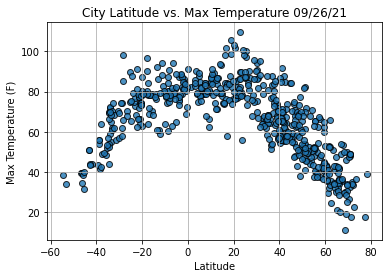

In [14]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

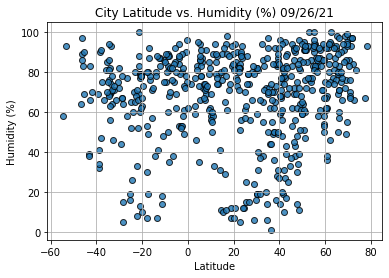

In [16]:
#Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

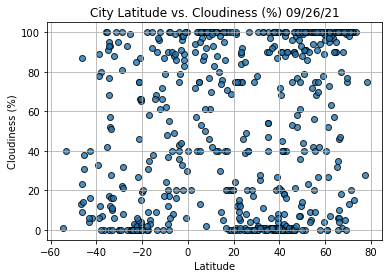

In [17]:
#Build the scatter plot for latitude vs. Cloudiness
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

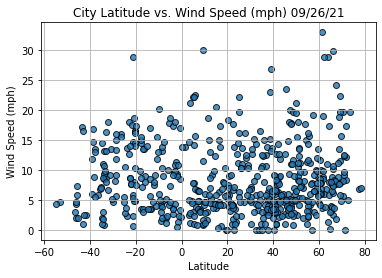

In [18]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()